# Analyzing Website Performance — Recording Academy & GRAMMYs

This polished notebook removes course-style prompts and focuses on **my analysis**: data prep, exploratory analysis, visualizations, and takeaways. For the full, original notebook with instructional cells, keep a separate copy if needed.

# **Project** | Analyzing Website Performance for The Grammys

<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/en/thumb/0/01/The_Recording_Academy_logo.svg/2560px-The_Recording_Academy_logo.svg.png" alt="The Recording Academy Logo" width="320"/>
</div>
<br>

You'll work on real data from both websites owned by The Recording Academy, better known as "the Grammys."

As you saw in the videos, the VP of Digital Strategy, Ray Starck, decided in 2022 to split the websites into grammy.comLinks to an external site. and recordingacademy.comLinks to an external site. to better serve the Recording Academy's various audience needs. You're tasked with examining the impact of splitting up the two websites, and analyzing the data for a better understanding of trends and audience behavior.


## Data Dictionary
You'll be working with two files, `grammys_live_web_analytics.csv` and `ra_live_web_analytics.csv`.

These files will contain the following information:

- **date** - The date the data was confirmed. It is in `yyyy-mm-dd` format.
- **visitors** - The number of users who went on the website on that day.
- **pageviews** - The number of pages that all users viewed on the website.
- **sessions** - The total number of sessions on the website. A session is a group of user interactions with your website that take place within a given time frame. For example a single session can contain multiple page views, events, social interactions.
- **bounced_sessions** - The total number of bounced sessions on the website. A bounced session is when a visitor comes to the website and does not interact with any pages / links and leaves.
- **avg_session_duration_secs** - The average length for all session durations for all users that came to the website that day.
- **awards_week** - A binary flag if the dates align with marketing campaigns before and after the Grammys award ceremony was held. This is the big marketing push to get as many eyeballs watching the event.
- **awards_night** - The actual night that Grammy Awards event was held.

# Part 1: Exploring the Data

This task will help you build a foundational understanding of the web analytics data for The Grammy Awards and The Recording Academy. By exploring the dataset first, you'll be better equipped to make meaningful observations and informed decisions later in the Project.


## Task 1

To start, import the both the `pandas`, and `plotly.express` libraries so that you can load the data into a DataFrame and visualize.


In [3]:
# Import libraries

import pandas as pd
import plotly.express as px


## Task 2

Load in the first two files for your analysis. They are the `grammy_live_web_analytics.csv` and `ra_live_web_analytics.csv`.


**A.** Read the `grammy_live_web_analytics.csv` file into your notebook. Store the data in a DataFrame named `full_df`.

**B.** Read the `ra_live_web_analytics.csv` file into your notebook. Store that data into a DataFrame called `rec_academy`.

**C.** Preview both DataFrames to familiarize yourself with the data.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Remeber: </strong>These files can be found in the datasets folder!
</span>
</div>

In [7]:
# Read in dataframes

full_df = pd.read_csv('datasets/grammy_live_web_analytics.csv')
rec_academy = pd.read_csv('datasets/ra_live_web_analytics.csv')

full_df.head()
#display(rec_academy)

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2017-01-01,9611,21407,10196,6490,86,0,0
1,2017-01-02,10752,25658,11350,7055,100,0,0
2,2017-01-03,11425,27062,12215,7569,92,0,0
3,2017-01-04,13098,29189,13852,8929,90,0,0
4,2017-01-05,12234,28288,12990,8105,95,0,0


In [8]:
rec_academy.head()

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2022-02-01,928,2856,1092,591,148,0,0
1,2022-02-02,1329,3233,1490,923,90,0,0
2,2022-02-03,1138,3340,1322,754,127,0,0
3,2022-02-04,811,2552,963,534,142,0,0
4,2022-02-05,541,1530,602,326,111,0,0


In [9]:
# preview full_df dataframe

display(full_df)

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2017-01-01,9611,21407,10196,6490,86,0,0
1,2017-01-02,10752,25658,11350,7055,100,0,0
2,2017-01-03,11425,27062,12215,7569,92,0,0
3,2017-01-04,13098,29189,13852,8929,90,0,0
4,2017-01-05,12234,28288,12990,8105,95,0,0
...,...,...,...,...,...,...,...,...
2337,2023-05-27,14332,34178,15430,5424,75,0,0
2338,2023-05-28,13798,31708,14662,5509,73,0,0
2339,2023-05-29,20563,53396,22244,7005,92,0,0
2340,2023-05-30,16105,37950,17264,6452,87,0,0


In [10]:
# preview rec_academy dataframe

display(rec_academy)

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2022-02-01,928,2856,1092,591,148,0,0
1,2022-02-02,1329,3233,1490,923,90,0,0
2,2022-02-03,1138,3340,1322,754,127,0,0
3,2022-02-04,811,2552,963,534,142,0,0
4,2022-02-05,541,1530,602,326,111,0,0
...,...,...,...,...,...,...,...,...
480,2023-05-27,845,2110,1058,702,96,0,0
481,2023-05-28,702,2100,872,537,137,0,0
482,2023-05-29,1027,2693,1197,777,125,0,0
483,2023-05-30,1320,4032,1658,992,166,0,0


## Task 3

The Grammy Awards are among the most prominent events in the global music industry. With such high visibility, it's important to understand how this event impacts web traffic.

**A.** Create a line chart of the number of users on the site for every day in the `full_df`.

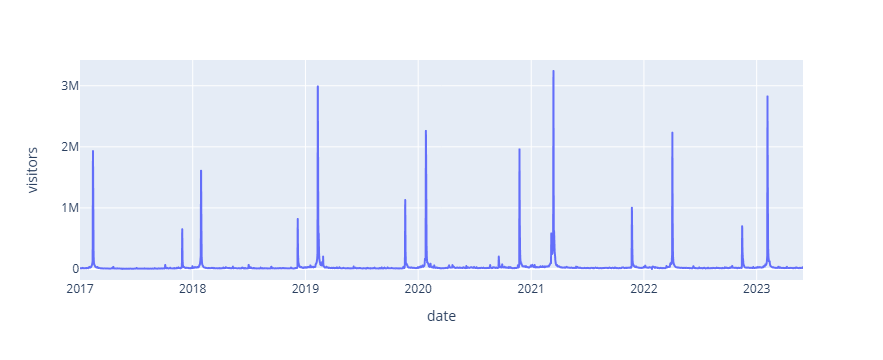

In [14]:
# Plot a line chart of the visitors on the site.

px.line(full_df, x = 'date', y = 'visitors')

In [18]:
full_df.sort_values('visitors', ascending=False).sample(20)

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
526,2018-06-11,22842,30176,23244,9366,264,0,0
208,2017-07-28,5274,8907,5552,3806,77,0,0
1787,2021-11-23,1003504,1894717,1139162,336053,147,1,0
1049,2019-11-16,20894,30222,21928,9041,67,0,0
1739,2021-10-06,16252,30017,17451,9112,87,0,0
170,2017-06-20,5278,8230,5586,2828,83,0,0
2252,2023-03-03,19518,37294,20717,10280,76,0,0
98,2017-04-09,6347,12067,6701,4855,78,0,0
1276,2020-06-30,35064,56582,38086,14062,139,0,0
755,2019-01-26,26408,44203,28040,12041,100,0,0


Several spikes in grammys.com traffic occurred outside of Grammy Awards Week or Awards Night. These are likely tied to industry-related events such as:

Nomination announcements or rule changes,

Special performances or tribute events,

Artist controversies or viral moments,

Media partnerships or campaigns

To validate these spikes, external sources like Grammy press releases, Billboard, Rolling Stone, Wikipedia timelines, Google News, and Google Trends can provide additional context.

These findings emphasize how external events beyond the main Grammy ceremonies influence audience behavior and website traffic.

In [27]:
# average number of visitors on awards nights versus other nights

# full_df.head()

aggregations = {'visitors':'mean'}

# Perform the groupby and aggregation
avg_visitors = full_df.groupby('awards_night').agg(aggregations)

display(avg_visitors.style.format("{:,.0f}"))

print(1389590 - 32388)

,visitors
awards_night,
0,"32,388"
1,"1,389,590"


1357202


**B.** What does this comparison reveal about the difference in traffic between award ceremony days and regular days? How many more visitors does the Grammy Awards site receive on Show Night?


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Remark: </strong>This is The Recording Academy's biggest challenge! How do you transform a business that relies on the success of one event per year into one that continues to bring users back on the site year round?
</span>
</div>

The data reveals a dramatic spike in web traffic on Grammy Awards nights, with approximately 1.35 million more visitors on those nights compared to regular days. This highlights a significant business risk for The Recording Academy: their website’s engagement is heavily reliant on a single, annual event.

To address this, they could focus on creating year-round content strategies — such as exclusive interviews, industry news, interactive fan experiences, or educational content about music. By building a more engaged, consistent user base, they can mitigate the risk of traffic volatility and unlock additional revenue opportunities beyond the awards ceremony itself.

## Task 5

When The Recording Academy split its digital presence across two domains, grammy.com and recordingacademy.com, the data capture for grammy.com was not affected. Meaning, the way visitor data was collected for grammy.com stayed exactly the same before and after the split. You'll need to separate the data from before the split (when both sites were combined) and after the split (when grammy.com data continued independently). The split happened on February 1, 2022 (`2022-02-01`).


Create two new DataFrames:

1. `combined_site` should contain all data with dates before `2022-02-01`.

2. `grammys` should contains all data with dates on or after `2022-02-01`.

In [28]:
# Split the data to separate the full_df into two new dataframes.
# One for before the switch of the websites and one for after

combined_site = full_df[full_df['date'] < '2022-02-01']
grammys = full_df[full_df['date'] >= '2022-02-01']

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Tip: </strong>After creating these DataFrames, best practice is to use the .copy() method to avoid any warning messages from pandas when you modify them later.
</span>
</div>

In [30]:
# Run the following cell - DO NOT MODIFY
# .copy() prevents pandas from printing a warning message
combined_site = combined_site.copy()
grammys = grammys.copy()

In [32]:
# print the shape of the combined_site dataframe
combined_site.shape

(1857, 8)

<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
      If done correctly, the <span style="font-family: monospace; color: #222;">combined_site</span> DataFrame should have a total of <strong>1857</strong> rows and <strong>8</strong> columns.
  </span>
</div>



# Part 2: Analyzing Key Metrics

Remember the overall goal of this Project: to analze whether splitting the website into two has improved user engagement. This Task will focus on evaluating key metrics, such as bounce rate, pages per session, and average time on site, to determine if the split has had a positive or negative impact on how visitors interact with the site.

In [35]:
# create the `pages_per_session` column for all 3 dataframes.

frames = [rec_academy, combined_site, grammys]

# For each data frame, create 'pages_per_session' column
for frame in frames:
    frame['pages_per_session'] = frame['pageviews'] / frame['sessions']


**C.** Visualize this new `pages_per_session` metric using a line chart for each site. You will have 3 separate graphs!

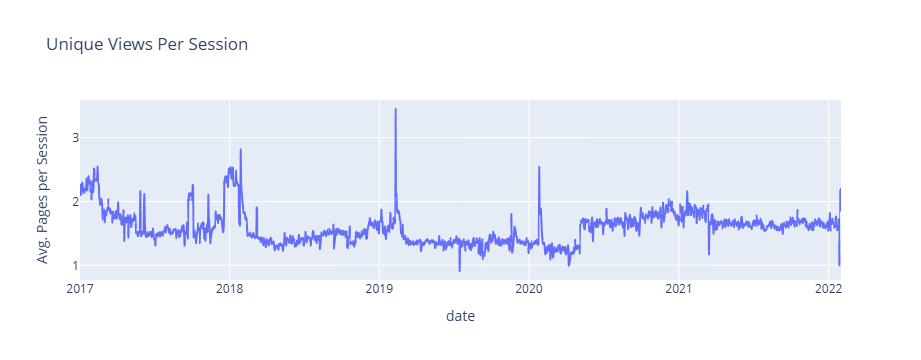

In [40]:
# combined_site graph

px.line(combined_site, x = 'date', y = 'pages_per_session', title = 'Unique Views Per Session',
       labels = {'pages_per_session': 'Avg. Pages per Session'}
       )

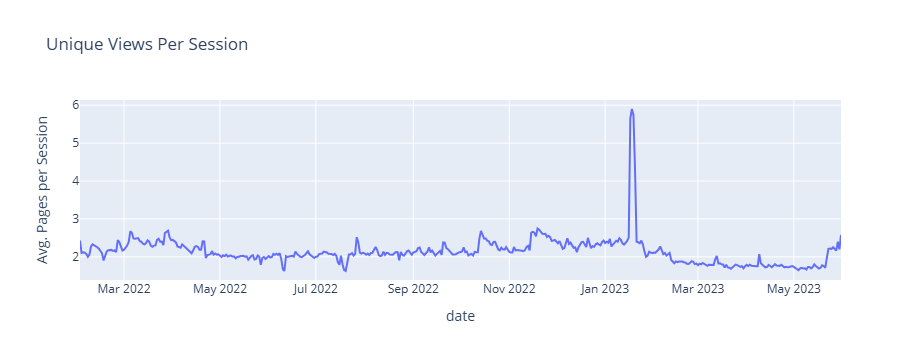

In [39]:
# grammys graph

px.line(grammys, x = 'date', y = 'pages_per_session', title = 'Unique Views Per Session', 
        labels = {'pages_per_session': 'Avg. Pages per Session'}
       
       )

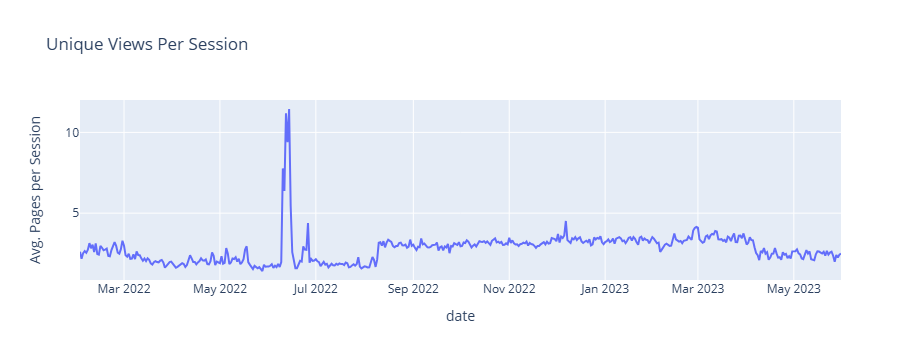

In [41]:
# rec_academy graph

px.line(rec_academy, x = 'date', y = 'pages_per_session', title = 'Unique Views Per Session',
       labels = {'pages_per_session': 'Avg. Pages per Session'}
       
       )

Pages per session is a strong indicator of user engagement. A higher value suggests users are exploring more content before leaving, while lower values suggest they’re only consuming limited content.

After the split, grammys.com maintained a relatively stable engagement pattern with a large spike around the Grammy Awards period, reflecting visitors focused on event-specific content. In contrast, recordingacademy.com showed more extreme spikes, possibly reflecting deeper, industry-focused browsing behavior on certain key dates.

Overall, this split indicates a divergence in user behavior: grammys.com remains more seasonal and casual-user focused, while recordingacademy.com may serve fewer but more engaged visitors on specific occasions.

In [44]:
# Calculate the Bounce Rate for each site

for frame in frames:
    result = bounce_rate(frame)
    print(f'Bounce Rate: {result:.2f}%')

    

Bounce Rate: 33.67%
Bounce Rate: 41.58%
Bounce Rate: 40.16%


<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
  If done correctly, the <span style="font-family: monospace; color: #222;">combined_site</span> and <span style="font-family: monospace; color: #222;">grammys</span> site will each have bounce rates in the low 40s. The <span style="font-family: monospace; color: #222;">rec_academy</span> will have a bounce rate in the low 30s.
  </span>
</div>


**C.** Next, you'll calculate the `average_time_on_site metric.`To do this, you only need to calculate the average of the `avg_session_duration_secs` column. Average Time on Site measures how engaging your website experience is for your users. The higher the number, the longer they are staying on your page and engaging with the content.

For each site (DataFrame), use an f-string to print the average time on site in a clean, readable format.

In [47]:
# Calculate the average of the avg_session_duration_secs

for frame in frames:
    average_time = frame['avg_session_duration_secs'].mean()
    print(f'Average Time on Site: {average_time:.2f} seconds')



Average Time on Site: 128.50 seconds
Average Time on Site: 102.85 seconds
Average Time on Site: 82.99 seconds


**D.** Which of these three metrics changed the most after the site split? What do these changes suggest about user behavior?

The Grammys site's average time on site decreased the most after the split, suggesting users are now engaging in shorter, more focused visits. Meanwhile, the Recording Academy site sees longer, more engaged sessions, likely reflecting users who are exploring detailed or professional content. This shift indicates that splitting the sites successfully aligned each one to its distinct audience’s behavior and needs.

# Part 3: Demographics

Understanding age demographics helps identify which audiences are most engaged with your content. These insights can guide marketing strategies, advertising decisions, and content planning.

You’ll analyze the age demographics for both websites. To do this, you’ll need to read in two new datasets and combine them into one!



## Task 8

The `grammys_age_demographics.csv` and `tra_age_demographics.csv` each contain the following information:

- **age_group** - The age group range. e.g. `18-24` are all visitors between the ages of 18 to 24 who come to the site.
- **pct_visitors** - The percentage of all of the websites visitors that come from that specific age group.

**A.** Read in the `grammys_age_demographics.csv` and `tra_age_demograhics.csv` files and store them into dataframes named `age_grammys` and `age_tra`, respectively.

In [48]:
# read in the files

age_grammys = pd.read_csv('datasets/grammys_age_demographics.csv')
age_tra = pd.read_csv('datasets/tra_age_demographics.csv')

In [49]:
# preview the age_grammys file. the age_tra will look very similar.
display(age_grammys)
display(age_tra)

,age_group,pct_visitors
0,18-24,27.373210
1,25-34,24.129273
2,35-44,18.717867
3,45-54,13.568619
4,55-64,9.817036
5,65+,6.393994


,age_group,pct_visitors
0,18-24,27.116827
1,25-34,26.155406
2,35-44,19.548684
3,45-54,13.823158
4,55-64,8.235619
5,65+,5.120306


**B.** For each dataframe, create a new column called `website` whose value is the name of the website.
e.g. the `age_grammys` values for `website` should all be `Grammys` and for the `age_tra` they should be `Recording Academy`.

In [50]:
# Label rows as 'Recording Academy'
age_tra['website'] = 'Recording Academy'


# Label rows as 'Grammys'
age_grammys['website'] = 'Grammys'

In [55]:
# Concatenate dataframes

combined_ages = [age_tra, age_grammys]

age_df = pd.concat(combined_ages)

# Preview combined data

age_df.shape

(12, 3)

<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
      If done correctly, your new DataFrame will have <strong>12</strong> rows and <strong>3</strong> columns.
  </span>
</div>

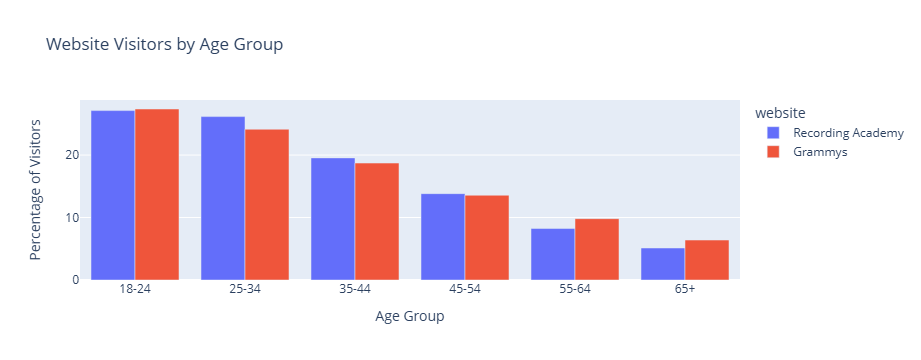

In [56]:
# age_group and pct_visitors bar chart

px.bar(age_df, x = 'age_group', y = 'pct_visitors', color = 'website', title = 'Website Visitors by Age Group',
       barmode = 'group', 
      labels = {'age_group': 'Age Group',
               'pct_visitors': 'Percentage of Visitors'
               }
      )

**E.** Looking at the chart above, what can you say about how the age demographics differ between the two websites?

The age demographics between the two websites are very similar across most age groups. Both sites have their largest audiences in the 18-24 and 25-34 age ranges, with only slight differences in percentages. The biggest difference appears among visitors aged 55 and older — the Grammys site has a slightly higher percentage of older visitors (55-64 and 65+) compared to the Recording Academy site.

This suggests that user behavior and audience demographics are fairly aligned between the two websites, with younger audiences being the primary visitors. However, the Grammys site seems to attract slightly more older users than the Recording Academy site.

# Part 4: Making a Business Recommendation


## Task 9

Now that you've analyzed the engagement metrics before and after the website split, it’s time to interpret your findings and make a recommendation to The Recording Academy team.


**A.** Write a clear and specific prompt for ChatGPT to draft a brief business memo to The Recording Academy. Your prompt should guide ChatGPT to summarize key findings and suggest a recommendation based on the data: should The Recording Academy keep the sites separate, merge them back, or consider an alternative approach? Paste your prompt below.

Write a brief business memo addressed to The Recording Academy. Summarize key findings from a recent web analytics analysis that compared the performance of the grammys.com and recordingacademy.com websites. The findings include differences in bounce rate, pages per session, average time on site, and audience age demographics. Based on these insights, provide a recommendation on whether The Recording Academy should continue operating the sites separately, consider merging them again, or explore an alternative strategy. Be sure to explain your reasoning clearly and concisely.

**B.** What did ChatGPT do well? Did it capture the key trends and insights? What was missing or inaccurate? Were any important details left out or misrepresented?

It captured every metric in the analysis that I wanted to precisely like I asked for. None of the details were left out. It gave me a summary of the key findings and then what improvements can be made to the business model based on these findings. 

**C.** Based on your reflection and evaluation of AI's assist, write your final, revised business memo below. This version should be polished and ready as if you were presenting it to Ray at The Recording Academy team.

To: Ray and The Recording Academy Team
From: Ghazi, Data Analyst
Subject: Website Performance Insights & Strategic Recommendation
Date: 07/20/25

Executive Summary
Following a detailed analysis of grammys.com and recordingacademy.com, this memo summarizes key findings across bounce rate, pages per session, average time on site, and audience age demographics. Based on these insights, I recommend continuing to operate these websites separately while refining each platform’s purpose and strategy to maximize engagement.

Key Insights
Bounce Rate:
Both sites show similar bounce rates in the low 40% range. This indicates visitors are not consistently exploring additional pages on either platform, underscoring an opportunity to enhance engagement.

Pages per Session:
Grammys.com demonstrates slightly higher pages per session; however, these peaks align closely with the annual Grammy Awards event and are not sustained throughout the year. Recordingacademy.com maintains steadier engagement patterns with users visiting fewer pages per session on average.

Average Time on Site:
Recordingacademy.com shows stronger engagement through longer average session durations. Visitors to this site are more likely to stay and engage with in-depth content, reflecting its role as an industry resource hub.

Audience Demographics:
Both sites attract a similar age distribution, heavily skewed toward the 18-34 demographic. Differences between the sites’ audiences are negligible and do not warrant a strategy shift based solely on age.


Recommendation
Maintain separate websites with distinct strategic focuses.

Grammys.com should remain the public-facing, event-driven site that captures attention during the awards season. Future strategies should aim to extend engagement beyond peak events through exclusive content, archives, and interactive features.

Recordingacademy.com should continue serving the industry audience and Academy members with resources, advocacy updates, and educational content to strengthen year-round engagement.

Rationale:
The data suggests combining the sites would dilute the strengths of each. Grammys.com thrives on seasonal visibility, while recordingacademy.com benefits from niche, sustained engagement. Keeping them separate allows for tailored strategies that align with user behavior and organizational objectives.
